In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### IFSC Code:

Every bank branch operating in the country is identified by its own unique IFSC code. 

* The first four characters are alphabets and tell the name of the bank. They remain the same for every bank branch.

* The fifth character is zero.

* The last 6 characters represent the bank branch and they are usually numeric. 

The code is assigned by the Reserve Bank of India. Any transfer system that’s regulated by the RBI will require the use of an IFSC code.

In [2]:
df = pd.read_csv('/home/yaggi/Desktop/dumps/bank_statement_dump.csv')
df

,uuid,application_id,account_number,password,bank,ifsc,file_id,status,reject_reason,statement_from,...,has_password,request_id,id,bank_statement_id,date,details,amount,balance,lender,created_at.1
0,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,0.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN,2019-08-15T22:53:47.792737+05:30
1,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,1.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN,2019-08-15T22:53:47.792737+05:30
2,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,2.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN,2019-08-15T22:53:47.792737+05:30
3,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,3.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN,2019-08-15T22:53:47.792737+05:30
4,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,4.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN,2019-08-15T22:53:47.792737+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,36.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,NFS/WDL RVSL/12-12-18/055201548478,10000.00,84881.33,NaN,2019-09-17T10:18:32.409865+05:30
1048571,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,37.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,IIN/I-Debit/PayTM /20181212120121,-4800.00,80081.33,NaN,2019-09-17T10:18:32.409865+05:30
1048572,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,38.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,NFS/CASH WDL/12-12-18,-6000.00,74081.33,NaN,2019-09-17T10:18:32.409865+05:30
1048573,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,39.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-13T05:30:00+05:30,MIN/Rentomojo /20181213002602/1,-1450.00,72631.33,NaN,2019-09-17T10:18:32.409865+05:30


In [3]:
df.columns

Index(['uuid', 'application_id', 'account_number', 'password', 'bank', 'ifsc',
       'file_id', 'status', 'reject_reason', 'statement_from', 'statement_to',
       'password_hint', 'score', 'created_at', 'has_password', 'request_id',
       'id', 'bank_statement_id', 'date', 'details', 'amount', 'balance',
       'lender', 'created_at.1'],
      dtype='object')

In [4]:
df.status.value_counts()

approved    954476
pending      94099
Name: status, dtype: int64

In [5]:
df.reject_reason.value_counts()

insufficient_max_limit    2986
corrupt_file              1769
parse_save_failed          357
password_unknown            52
Name: reject_reason, dtype: int64

In [6]:
df.lender.value_counts() #-> lender Exists Feat Engg.

Camden town technologies               2544
Finnovation Tech Solutions Pvt. Ltd    2520
IVL Finance                            1429
Bajaj Finance                           894
KrazeyBee                               827
Ashish Securities                       724
Personal Loan - Unknown Lender          699
Home Credit                             642
ICICI Bank                              536
SmartCoin                               532
Bhanix Finance                          429
Akara Capital                           427
PaySense                                396
E-Pay later                             355
DMI Finance                             311
Vivifi Tech                             304
Sunidhi Capital                         237
HDFC Bank                               173
IIFL                                    152
flashcash                               113
Mannapuram finance                      108
Other Loan                               89
TATA Capital                    

In [7]:
df.isnull().sum()

uuid                       0
application_id             0
account_number        590544
password              143331
bank                       2
ifsc                  268783
file_id                    0
status                     0
reject_reason        1043411
statement_from         94101
statement_to           94101
password_hint        1035299
score                  94101
created_at                 0
has_password               0
request_id            804890
id                    109831
bank_statement_id     109831
date                  109831
details               109831
amount                109831
balance               109831
lender               1033679
created_at.1          109831
dtype: int64

In [8]:
df.drop(['uuid', 'account_number', 'password', 'status', 'reject_reason',
         'password_hint', 'score', 'created_at', 'has_password', 'request_id',
         'id', 'bank_statement_id', 'created_at.1'],axis=1,inplace=True)

In [9]:
df.columns = ['App_ID','Bank','IFSC','File_ID','Statement_Start','Statement_End','Transaction_Date','Transaction_Details','Amount','Balance','Lender']
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN
1,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN
2,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN
3,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN
4,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048570,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,NFS/WDL RVSL/12-12-18/055201548478,10000.00,84881.33,NaN
1048571,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,IIN/I-Debit/PayTM /20181212120121,-4800.00,80081.33,NaN
1048572,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,NFS/CASH WDL/12-12-18,-6000.00,74081.33,NaN
1048573,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-13T05:30:00+05:30,MIN/Rentomojo /20181213002602/1,-1450.00,72631.33,NaN


In [10]:
df.Statement_Start = df.Statement_Start.apply(lambda x:str(x).split('T')[0])
df.Statement_End = df.Statement_End.apply(lambda x:str(x).split('T')[0])
df.Transaction_Date = df.Transaction_Date.apply(lambda x:str(x).split('T')[0])

App_ID                       0
Bank                         2
IFSC                    268783
File_ID                      0
Statement_Start          94101
Statement_End            94101
Transaction_Date        109831
Transaction_Details     109831
Amount                  109831
Balance                 109831
Lender                 1033679
dtype: int64


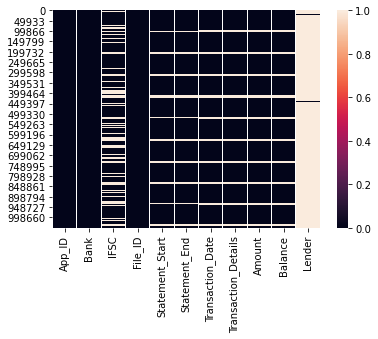

App_ID                      0
Bank                        0
IFSC                   165467
File_ID                     0
Statement_Start            27
Statement_End              27
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 923848
dtype: int64


In [11]:
df.Transaction_Date.replace('nan',np.nan,inplace=True)
df.Statement_End.replace('nan',np.nan,inplace=True)
df.Statement_Start.replace('nan',np.nan,inplace=True)

print(df.isnull().sum())

sns.heatmap(df.isnull())
plt.show()

df = df[~df.Transaction_Date.isnull()]

print(df.isnull().sum())

In [12]:
df = df[~df.Statement_End.isnull()]

#### Handling the Dates!

In [13]:
# df.Transaction_Date.apply(lambda x:len(str(x).split('-')[0])).value_counts()

df['Transaction_Year'] = df.Transaction_Date.apply(lambda x:str(x).split('-')[0])
df.Transaction_Year.value_counts()

df = df[df['Transaction_Year'].isin(['2019','2018','2020'])]

df.Transaction_Date = pd.to_datetime(df.Transaction_Date)
df.Statement_End = pd.to_datetime(df.Statement_End)
df.Statement_Start = pd.to_datetime(df.Statement_Start)

df.drop('Transaction_Year',axis=1,inplace=True)

In [14]:
df.isnull().sum()

App_ID                      0
Bank                        0
IFSC                   165393
File_ID                     0
Statement_Start             0
Statement_End               0
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 923755
dtype: int64

#### Considering 3Months Statement

In [15]:
statements = df.groupby(['App_ID','Bank','IFSC'])['File_ID'].count().reset_index()
statements[statements.File_ID>=3].shape,statements.shape

((5206, 4), (5837, 4))

In [16]:
statements = statements[statements.File_ID>=3]
statements

,App_ID,Bank,IFSC,File_ID
0,58560,icici,ICIC0001577,291
1,58560,kotak,KKBK0005197,194
2,58563,axis,UTIB0000733,38
3,58563,axis,UTIB0002157,5
4,58563,kotak,KKBK0000563,3
...,...,...,...,...
5832,121848,kotak,KKBK0001782,239
5833,121874,hdfc,HDFC0000236,136
5834,121881,kotak,KKBK0007801,80
5835,121895,kotak,KKBK0008070,140


In [17]:
statements = statements[['App_ID','Bank','IFSC']]
df = pd.merge(df,statements)
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN
1,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN
2,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN
3,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN
4,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
772317,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-26,UPI-DNYANESHWAR JANARDHA-BARBAILED@OKAXIS-UBIN...,3000.00,3579.40,NaN
772318,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-27,IMPS-923907312626--UBIN-XXXXXXXXXXX7370-TRF,-3000.00,579.40,NaN
772319,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-28,.IMPS P2P 923813378044#26/08/2019 260819-MIR19...,-5.90,573.50,NaN
772320,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-29,.IMPS P2P 923907312626#27/08/2019 270819-MIR19...,-5.90,567.60,NaN


In [18]:
df.columns

Index(['App_ID', 'Bank', 'IFSC', 'File_ID', 'Statement_Start', 'Statement_End',
       'Transaction_Date', 'Transaction_Details', 'Amount', 'Balance',
       'Lender'],
      dtype='object')

In [19]:
df[df.App_ID==117570][['Bank','File_ID','IFSC','Statement_Start','Statement_End']].drop_duplicates()

,Bank,File_ID,IFSC,Statement_Start,Statement_End
311462,kotak,930134,KKBK0003650,2019-09-01,2019-09-30
311478,kotak,930135,KKBK0003650,2019-05-01,2019-05-31
311479,kotak,930137,KKBK0003650,2020-03-01,2020-03-31
311515,kotak,930143,KKBK0003650,2020-04-01,2020-04-30
311543,kotak,930129,KKBK0003650,2020-02-01,2020-02-29
311572,kotak,930145,KKBK0003650,2019-12-01,2019-12-31
311604,kotak,930148,KKBK0003650,2020-05-01,2020-05-31
525324,kotak,930131,KKBK0003649,2019-09-01,2019-09-30
525335,kotak,930133,KKBK0003649,2019-10-01,2019-10-31
525336,kotak,930140,KKBK0003649,2019-11-01,2019-11-30


In [20]:
statements_3m = df[['App_ID', 'Bank', 'IFSC', 'File_ID', 'Statement_Start', 'Statement_End']].drop_duplicates().sort_values('Statement_End').groupby(['App_ID','Bank','IFSC']).tail(3)
statements_3m

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End
626371,58563,kotak,KKBK0000563,408213,2018-07-01,2018-07-31
746484,61661,kotak,KKBK0007457,437363,2018-07-01,2018-07-31
648313,61463,kotak,KKBK0004260,296286,2018-07-01,2018-07-31
690815,59936,kotak,KKBK0004593,420460,2018-07-01,2018-07-31
768830,62453,rbl,RATN0000241,445422,2018-07-01,2018-07-31
...,...,...,...,...,...,...
528693,118923,axis,UTIB0000540,949806,2020-05-01,2020-05-31
315710,75355,axis,UTIB0000005,934124,2020-05-01,2020-05-31
724737,120828,kotak,KKBK0006744,944851,2020-05-01,2020-05-31
768627,117294,rbl,RATN0000207,948387,2020-05-01,2020-05-31


In [21]:
print(df.shape)
df = pd.merge(df,statements_3m)
df.shape

(772322, 11)


(468791, 11)

In [22]:
df.sort_values(['App_ID','Bank', 'IFSC','Statement_End'],ascending=False)

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
294068,122064,kotak,KKBK0002860,949218,2020-04-01,2020-04-30,2020-04-01,OPENINGBALANCE...,35.17,35.17,NaN
294069,122064,kotak,KKBK0002860,949218,2020-04-01,2020-04-30,2020-04-23,Chrg:AQBNonMaintenanceforQuarterendMar-2020,-5.67,29.50,NaN
294070,122064,kotak,KKBK0002860,949218,2020-04-01,2020-04-30,2020-04-29,RemChrgs:POSDECLFEE/xx3368/001908299332/190120...,-29.50,0.00,NaN
294071,122064,kotak,KKBK0002860,949224,2020-03-01,2020-03-31,2020-03-04,MB:RECEIVEDFROM2412511518,9500.00,9500.00,NaN
294072,122064,kotak,KKBK0002860,949224,2020-03-01,2020-03-31,2020-03-04,UPI/nainesh.pat/006412158207/pay,-9500.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
178586,58560,icici,ICIC0001577,408118,2019-01-01,2019-01-31,2019-01-28,UPI/902645481731/Payment from Ph/3024201008690...,-4700.00,75.31,NaN
178587,58560,icici,ICIC0001577,408118,2019-01-01,2019-01-31,2019-01-29,UPI/902922676579/UPI/shwetayadav0511/Vijaya Bank,500.00,575.31,NaN
178588,58560,icici,ICIC0001577,408118,2019-01-01,2019-01-31,2019-01-29,UPI/902923969751/UPI/shwetayadav0511/Vijaya Bank,-1.00,574.31,NaN
178589,58560,icici,ICIC0001577,408118,2019-01-01,2019-01-31,2019-01-30,NFS/50219461/CASH WDL/30-01-19,-500.00,74.31,NaN


In [23]:
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424932,2019-07-01,2019-07-31,2019-07-01,UPI/918209120798/Shiva/mshivaprasad199/Axis Ba...,57.0,215.96,NaN
1,60453,icici,ICIC0000040,424932,2019-07-01,2019-07-31,2019-07-01,UPI/918210988207/UPI/saifkarimmohamm/ICICI Bank,91.0,306.96,NaN
2,60453,icici,ICIC0000040,424932,2019-07-01,2019-07-31,2019-07-01,UPI/918211527517/UPI/tejajunnu1@okic/Federal Bank,65.0,371.96,NaN
3,60453,icici,ICIC0000040,424932,2019-07-01,2019-07-31,2019-07-01,UPI/918224013411/Payment from Ph/Q61890425@ybl...,-21.0,350.96,NaN
4,60453,icici,ICIC0000040,424932,2019-07-01,2019-07-31,2019-07-01,NFS/CPRH4260/CASH WDL/01-07-19,-300.0,50.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...
468786,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-26,UPI-DNYANESHWAR JANARDHA-BARBAILED@OKAXIS-UBIN...,3000.0,3579.40,NaN
468787,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-27,IMPS-923907312626--UBIN-XXXXXXXXXXX7370-TRF,-3000.0,579.40,NaN
468788,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-28,.IMPS P2P 923813378044#26/08/2019 260819-MIR19...,-5.9,573.50,NaN
468789,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-29,.IMPS P2P 923907312626#27/08/2019 270819-MIR19...,-5.9,567.60,NaN


In [24]:
df.isnull().sum()

App_ID                      0
Bank                        0
IFSC                        0
File_ID                     0
Statement_Start             0
Statement_End               0
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 460064
dtype: int64

In [25]:
## Static Lenders, last updated in 2019 --> Ignore!

df.drop('Lender',axis=1,inplace=True)

In [26]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r'[0-9]','',text) #Removing Numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
#     text = re.sub('\w*\d\w*', '', text) #text with numbers in it to be removed!
    return text

round1 = lambda x: clean_text_round1(x)

In [27]:
df.Transaction_Details

0         UPI/918209120798/Shiva/mshivaprasad199/Axis Ba...
1           UPI/918210988207/UPI/saifkarimmohamm/ICICI Bank
2         UPI/918211527517/UPI/tejajunnu1@okic/Federal Bank
3         UPI/918224013411/Payment from Ph/Q61890425@ybl...
4                            NFS/CPRH4260/CASH WDL/01-07-19
                                ...                        
468786    UPI-DNYANESHWAR JANARDHA-BARBAILED@OKAXIS-UBIN...
468787          IMPS-923907312626--UBIN-XXXXXXXXXXX7370-TRF
468788    .IMPS P2P 923813378044#26/08/2019 260819-MIR19...
468789    .IMPS P2P 923907312626#27/08/2019 270819-MIR19...
468790          IMPS-924214391372--UBIN-XXXXXXXXXXX7370-TRF
Name: Transaction_Details, Length: 468791, dtype: object

In [28]:
df['New_Transaction_Details'] = df.Transaction_Details.apply(round1)
df['New_Transaction_Details']

0                    upi  shiva mshivaprasad axis bank ltd 
1                       upi  upi saifkarimmohamm icici bank
2                      upi  upi tejajunnu okic federal bank
3                    upi  payment from ph q ybl icici bank 
4                                      nfs cprh cash wdl   
                                ...                        
468786    upi dnyaneshwar janardha barbailed okaxis ubin...
468787                          imps   ubin xxxxxxxxxxx trf
468788                                     imps pp      mir
468789                                     imps pp      mir
468790                          imps   ubin xxxxxxxxxxx trf
Name: New_Transaction_Details, Length: 468791, dtype: object

### Vectorizing Transaction Details!

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english')#, min_df=1, max_df=.5)#, ngram_range=(1,2))
cvec

CountVectorizer(stop_words='english')

In [30]:
from itertools import islice
cvec.fit(df.New_Transaction_Details)
list(islice(cvec.vocabulary_.items(), 20))

[('upi', 71489),
 ('shiva', 63437),
 ('mshivaprasad', 42664),
 ('axis', 5170),
 ('bank', 6177),
 ('saifkarimmohamm', 58900),
 ('icici', 25681),
 ('tejajunnu', 68770),
 ('okic', 47178),
 ('federal', 19824),
 ('payment', 49470),
 ('ph', 50667),
 ('ybl', 75227),
 ('nfs', 45755),
 ('cprh', 13871),
 ('cash', 10441),
 ('wdl', 74368),
 ('arunpub', 4138),
 ('okhdfcb', 47170),
 ('hdfc', 24121)]

In [31]:
len(cvec.vocabulary_)

76662

In [32]:
cvec = CountVectorizer(stop_words='english', min_df=.00001, max_df=.1)#, ngram_range=(1,2))
cvec.fit(df.New_Transaction_Details)
len(cvec.vocabulary_)

15868

In [33]:
cvec_counts = cvec.transform(df.New_Transaction_Details)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (468791, 15868)
nonzero count: 1544994
sparsity: 0.02%


In [34]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,term,occurrences
15619,xxxxxx,46227
5362,imps,43291
10463,pos,38987
9987,payment,37107
10015,paytm,36433
8723,na,29834
15681,ybl,28222
9679,pa,25973
4929,hdfc,25128
9989,paymentfro,23444


In [35]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<468791x15868 sparse matrix of type '<class 'numpy.float64'>'
	with 1544994 stored elements in Compressed Sparse Row format>

In [36]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
9989,paymentfro,0.044829
8723,na,0.033116
10015,paytm,0.027007
15619,xxxxxx,0.026349
10463,pos,0.024050
5362,imps,0.023609
9987,payment,0.023349
9679,pa,0.022029
15681,ybl,0.017360
9510,openingbalance,0.014968


In [37]:
weights_df#

,term,weight
0,aa,0.000039
1,aaa,0.000015
2,aabidsayed,0.000021
3,aadarsh,0.000018
4,aadhar,0.000010
...,...,...
15863,zubair,0.000012
15864,zuber,0.000056
15865,zuberkhan,0.000024
15866,zx,0.000021


In [38]:
weights_df = dict(weights_df.groupby('term')['weight'].first())
weights_df

{'aa': 3.870897090803956e-05,
 'aaa': 1.4640951384887689e-05,
 'aabidsayed': 2.0548061356977537e-05,
 'aadarsh': 1.833986302450979e-05,
 'aadhar': 9.705782856472691e-06,
 'aadharrshila': 8.654552578433725e-06,
 'aadharsh': 1.0097007937042731e-05,
 'aadharshil': 8.232149499922353e-06,
 'aadharshila': 8.000103337983429e-05,
 'aadya': 1.1818034134920421e-05,
 'aah': 1.5099405791430085e-05,
 'aahmadabadvalue': 2.2817018969023782e-05,
 'aakank': 1.7841713936413783e-05,
 'aakansha': 4.272485750243893e-05,
 'aakash': 4.9726822742920916e-05,
 'aakashhotel': 1.9181288412515314e-05,
 'aakashjha': 1.1816729490806542e-05,
 'aakib': 7.612095259944123e-06,
 'aakil': 3.273348573600741e-05,
 'aal': 1.3392900026976243e-05,
 'aalam': 1.1692531502498234e-05,
 'aamir': 4.64917382178794e-05,
 'aamirsal': 8.512672851928073e-06,
 'aapspdcl': 5.530826010602273e-06,
 'aaqib': 4.3545659748740717e-05,
 'aaqibhussa': 2.928820882324981e-05,
 'aara': 1.2525390098450768e-05,
 'aaravint': 9.53164611248532e-06,
 'aari

In [42]:
df.New_Transaction_Details

0                    upi  shiva mshivaprasad axis bank ltd 
1                       upi  upi saifkarimmohamm icici bank
2                      upi  upi tejajunnu okic federal bank
3                    upi  payment from ph q ybl icici bank 
4                                      nfs cprh cash wdl   
                                ...                        
468786    upi dnyaneshwar janardha barbailed okaxis ubin...
468787                          imps   ubin xxxxxxxxxxx trf
468788                                     imps pp      mir
468789                                     imps pp      mir
468790                          imps   ubin xxxxxxxxxxx trf
Name: New_Transaction_Details, Length: 468791, dtype: object

## Handling Anomalies based on Date!

In [ ]:
anomaly_1 = df[df.Transaction_Date<df.Statement_Start]
anomaly_2 = df[df.Transaction_Date>df.Statement_End]

In [ ]:
anomalies = pd.concat([anomaly_1,anomaly_2])
anomalies

In [ ]:
temp = anomalies.groupby('App_ID')['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.columns = ['App_ID','Debit_Anomalies','Credit_Anomalies']
df = pd.merge(df,temp,how='left')

print(df.isnull().sum())

df.Debit_Anomalies.fillna(0,inplace=True)
df.Credit_Anomalies.fillna(0,inplace=True)

In [ ]:
df.groupby(['App_ID','Bank'])['File_ID'].count()

## Debits, Credits, Debit Credit Ratio(Nos and Amts), Total Transactions

In [ ]:
df.drop('IFSC',axis=1,inplace=True)

In [ ]:
df['nBanks'] = df.App_ID.map(df.groupby('App_ID')['Bank'].nunique())

In [ ]:
df[df.Amount>0].shape

In [ ]:
# df.Amount.apply(lambda x: (x>0)).sum()
debt_cred = df.groupby('App_ID')['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
debt_cred.columns = ['App_ID','Overall_Debits','Overall_Credits']
df = pd.merge(df,debt_cred)

In [ ]:
debit_amount = df[df['Amount']<0].groupby('App_ID')[['Amount']].sum().transform(lambda x:abs(x)).reset_index()
debit_amount.rename(columns = {'Amount':'Overall_Debit_Amount'},inplace=True)
credit_amount = df[df['Amount']>0].groupby('App_ID')[['Amount']].sum().transform(lambda x:abs(x)).reset_index()
credit_amount.rename(columns = {'Amount':'Overall_Credit_Amount'},inplace=True)
df = pd.merge(df,debit_amount,how='left')
df = pd.merge(df,credit_amount,how='left')
df.isnull().sum()

In [ ]:
df.Overall_Debit_Amount.fillna(0,inplace=True)
df.Overall_Credit_Amount.fillna(0,inplace=True)

In [ ]:
df[df.Overall_Credit_Amount==0].shape

In [ ]:
df.Bank.value_counts()

### Bank Wise Debits and Credits & Amounts

In [ ]:
temp = df.groupby(['App_ID','Bank'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_Bankwise','nDebitsMean_Bankwise','nCreditsMedian_Bankwise','nCreditsMean_Bankwise']
df = pd.merge(df,temp,how='left')
df.isnull().sum()

In [ ]:
bank_debit_amount = df[df['Amount']<0].groupby(['App_ID','Bank'])[['Amount']].sum().transform(lambda x:abs(x)).reset_index()
bank_debit_amount.rename(columns = {'Amount':'Bank_Debit_Amount'},inplace=True)
bank_debit_amount = bank_debit_amount.groupby('App_ID').agg({'Bank_Debit_Amount':[np.median,np.mean]})
bank_debit_amount.columns = ['DebitAmount_Median_Bankwise','DebitAmount_Mean_Bankwise']
df = pd.merge(df,bank_debit_amount.reset_index(),how='left')

bank_credit_amount = df[df['Amount']>0].groupby(['App_ID','Bank'])[['Amount']].sum().transform(lambda x:abs(x)).reset_index()
bank_credit_amount.rename(columns = {'Amount':'Bank_Credit_Amount'},inplace=True)
bank_credit_amount = bank_credit_amount.groupby('App_ID').agg({'Bank_Credit_Amount':[np.median,np.mean]})
bank_credit_amount.columns = ['CreditAmount_Median_Bankwise','CreditAmount_Mean_Bankwise']
df = pd.merge(df,bank_credit_amount.reset_index(),how='left')

df.isnull().sum()

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
temp = df.groupby(['App_ID','Bank','Statement_Start'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID','Bank']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','Bank','nDebits_Median_BankStatementwise','nDebits_Mean_BankStatementwise','nCredits_Median_BankStatementwise','nCredits_Mean_BankStatementwise']
temp = temp.groupby('App_ID').agg({
    'nDebits_Median_BankStatementwise' : np.median,
    'nDebits_Mean_BankStatementwise' : np.mean,
    'nCredits_Median_BankStatementwise' : np.median,
    'nCredits_Mean_BankStatementwise' : np.mean
}).reset_index()
df = pd.merge(df,temp,how='left')
df.isnull().sum()

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
bank_statement_debit_amount = df[df['Amount']<0].groupby(['App_ID','Bank','Statement_Start'])['Amount'].sum().transform(lambda x:abs(x)).reset_index()
bank_statement_debit_amount = bank_statement_debit_amount.groupby(['App_ID','Bank'])['Amount'].agg([np.median,np.mean]).reset_index()
bank_statement_debit_amount = bank_statement_debit_amount.groupby('App_ID').agg({'median' : np.median,'mean' : np.mean}).reset_index()
bank_statement_debit_amount.columns = ['App_ID','DebitAmount_Median_Monthly_Bankwise','DebitAmount_Mean_Monthly_Bankwise']
df = pd.merge(df,bank_statement_debit_amount,how='left')

bank_statement_credit_amount = df[df['Amount']>0].groupby(['App_ID','Bank','Statement_Start'])['Amount'].sum().transform(lambda x:abs(x)).reset_index()
bank_statement_credit_amount = bank_statement_credit_amount.groupby(['App_ID','Bank'])['Amount'].agg([np.median,np.mean]).reset_index()
bank_statement_credit_amount = bank_statement_credit_amount.groupby('App_ID').agg({'median' : np.median,'mean' : np.mean}).reset_index()
bank_statement_credit_amount.columns = ['App_ID','CreditAmount_Median_Monthly_Bankwise','CreditAmount_Mean_Monthly_Bankwise']
df = pd.merge(df,bank_statement_credit_amount,how='left')
df.isnull().sum()

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.columns

## Forming New DF!

In [ ]:
new_df = pd.merge(df['App_ID'],df.iloc[:,df.columns.get_loc('Overall_Debits'):],left_index=True,right_index=True).drop_duplicates().reset_index(drop=True)
new_df

# **Clustering**

## Clustering on new DF!